# Seattle Weather Exploration and Analysis

We moved from Mississippi to Seattle in January 2023, covering a vast distance across the country. Since these cities are quite far apart and situated in different regions of the country, we anticipate a notable contrast in the weather. To grasp this transition more deeply, leveraging my skills as a Data Analyst, I'm creating a Jupyter notebook to explore and analyze Seattle's historical weather data. My objective is to gain a thorough understanding of Seattle's weather patterns throughout the year.

## 1. Set up enviroment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 

## 2. Get the data

#### Download the data

The daily summary weather data was found on https://www.ncdc.noaa.gov/cdo-web/search.

In this source, we can find daily records of high and low temperature and precipitation for most locations in the US.

For our purpose, we choose to download the below dataset:

- TYPE: Daily Summaries
- Date Range: 2000-01-01 to 2022-12-31
- STATION:	USW00024233
- NAME:		SEATTLE TACOMA AIRPORT, WA US
- LATITUDE:	47.44467
- LONGITUDE:	-122.31442
- ELEVATION:	112.5

Datatype:
- AWND = Average daily wind speed (miles per hour)
- PRCP = Precipitation (inches)
- SNOW = Snowfall (inches)
- SNWD = Snow depth (inches)
- TMAX = Maximum temperature (Fahrenheit)
- TMIN = Minimum temperature (Fahrenheit)

In [2]:
# Only a subset of columns will be selected for analysis
usecols = { 'DATE':'date',
            'TMAX':'temp_max', 
            'TMIN':'temp_min', 
            'AWND':'wind_speed',
            'PRCP':'precip',            
            'SNOW':'snow_fall', 
            'SNWD':'snow_depth', }

# Load data from csv file and set DATE column as index
data = pd.read_csv("SeattleWeather_2000_2022.csv",
                   usecols=list(usecols.keys()),                   
                   index_col='DATE', parse_dates=True)

# Rename columns for readability
data.rename(usecols,  axis='columns', inplace=True)

data.head()

,wind_speed,precip,snow_fall,snow_depth,temp_max,temp_min
DATE,,,,,,
2000-01-01,12.30,0.27,NaN,NaN,43,37
2000-01-02,8.95,0.00,NaN,NaN,45,37
2000-01-03,9.40,0.28,NaN,NaN,47,36
2000-01-04,13.42,0.30,NaN,NaN,50,42
2000-01-05,6.71,0.00,NaN,NaN,44,37


#### Preview data

In [3]:
# Conscise summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8401 entries, 2000-01-01 to 2022-12-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wind_speed  8401 non-null   float64
 1   precip      8397 non-null   float64
 2   snow_fall   5144 non-null   float64
 3   snow_depth  5146 non-null   float64
 4   temp_max    8401 non-null   int64  
 5   temp_min    8401 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 459.4 KB


- The record contains 8401 observed dates from 2000-01-01 to 2022-12-31
- Datatype looks fine
- There seems to be missing data for precip, snow_fall, snow_depth that will need to be handled

In [4]:
# Summary Statistics
data.describe()

,wind_speed,precip,snow_fall,snow_depth,temp_max,temp_min
count,8401.000000,8397.000000,5144.000000,5146.000000,8401.000000,8401.000000
mean,7.502068,0.108159,0.021734,0.035853,60.463040,45.744197
std,3.076938,0.252712,0.277643,0.366146,12.977677,8.967224
min,0.000000,0.000000,0.000000,0.000000,25.000000,14.000000
25%,5.370000,0.000000,0.000000,0.000000,50.000000,39.000000
50%,6.930000,0.000000,0.000000,0.000000,59.000000,46.000000
75%,9.400000,0.100000,0.000000,0.000000,70.000000,53.000000
max,21.470000,5.020000,8.900000,7.100000,108.000000,73.000000


- Record high temperature is 108 $^o$F.
- Record low temperature is 14 $^o$F..
- Record snow depth is 7.1 inches.
- Record high windspeed is 21.47 miles per hours
- Record precipation is 5.02 inches.


**Note**: We noticed that the min of temp_avg is 0 while the min of temp_min is 14. Therefore there might be incorrect data in temp_avg. Let examine all the temp_avg that is lower than temp_min


In [5]:
# Save concise data to csv
data.to_csv("Concise_data.csv")

## Clean data

#### Missing data

In [6]:
# Count missing data for each column
data.isna().sum()

wind_speed       0
precip           4
snow_fall     3257
snow_depth    3255
temp_max         0
temp_min         0
dtype: int64

- wind_speed, temp_max, temp_min columns don't have any missing data
- precip only have 4 missing data
-  snow_fall, and snow_depth have more than 3000 data missing

We will take a closer look at those missing data column and decide how to handle them

In [7]:
# Seperate weather data type for eaiser handle
temp = data[["temp_max","temp_min"]].copy()
temp['temp_avg'] = temp.mean(axis=1)
wind = data[["wind_speed"]].copy()
precip = data[["precip"]].copy()
snow = data[[ "snow_fall", "snow_depth"]].copy()

#### Precipation

In [8]:
# Examine data points with NA values 
precip_null = precip["precip"].isna()
precip[precip_null]

,precip
DATE,
2005-09-05,NaN
2021-12-18,NaN
2021-12-28,NaN
2021-12-30,NaN


##### Zoom in to adjacents dates to NA values

In [9]:
precip.loc['2005-09-02':'2005-09-08']

,precip
DATE,
2005-09-02,0.0
2005-09-03,0.0
2005-09-04,0.0
2005-09-05,NaN
2005-09-06,0.0
2005-09-07,0.0
2005-09-08,0.0


In [10]:
precip.loc['2021-12-15':'2022-01-02']

,precip
DATE,
2021-12-15,0.08
2021-12-16,0.05
2021-12-17,0.18
2021-12-18,NaN
2021-12-19,0.00
2021-12-20,0.26
2021-12-21,0.19
2021-12-22,0.43
2021-12-23,0.16


##### Fill in NA

Given that this is time series data, we can utilize the "time" method of pandas.DataFrame.interpolate to effectively impute missing precipitation data using linear interpolation on DatatimeIndex.

Linear interpolation assume relationships betweens two data points is linear and and estimate the value at a point between them.

In [11]:
# Fill in missing values
precip.interpolate('time', inplace=True)

In [12]:
# Check to see if missing values are filled
precip[precip_null]

,precip
DATE,
2005-09-05,0.000
2021-12-18,0.090
2021-12-28,0.080
2021-12-30,0.065


##### Zoom in to verify

In [13]:
precip.loc['2005-09-02':'2005-09-8']

,precip
DATE,
2005-09-02,0.0
2005-09-03,0.0
2005-09-04,0.0
2005-09-05,0.0
2005-09-06,0.0
2005-09-07,0.0
2005-09-08,0.0


Since the values of the previous date (2005-09-04) and next date (2005-09-06) are both 0, the value of 2005-09-05 would be (0+0)/2 = 0.

In [14]:
precip.loc['2021-12-15':'2022-01-02']

,precip
DATE,
2021-12-15,0.080
2021-12-16,0.050
2021-12-17,0.180
2021-12-18,0.090
2021-12-19,0.000
2021-12-20,0.260
2021-12-21,0.190
2021-12-22,0.430
2021-12-23,0.160


- For 2021-12-18, the filled in value = (value of 2021-12-17 + value of 2021-12-19)/2 = (0.18+0)/2 = 0.09
- Similarly, for 2021-12-28, filled in value = (0.03+0.13)/2 = 0.08
- For 2021-12-30, filled in value = (0.13+0.0)/2 = 0.065

#### Snow

In [15]:
# Investigate missing data
snow[snow["snow_fall"].isna()]

,snow_fall,snow_depth
DATE,,
2000-01-01,NaN,NaN
2000-01-02,NaN,NaN
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
...,...,...
2008-11-26,NaN,NaN
2008-11-27,NaN,NaN
2008-11-28,NaN,NaN


In [16]:
snow[snow["snow_depth"].isna()]

,snow_fall,snow_depth
DATE,,
2000-01-01,NaN,NaN
2000-01-02,NaN,NaN
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
...,...,...
2008-11-26,NaN,NaN
2008-11-27,NaN,NaN
2008-11-28,NaN,NaN


It looks like most of the data from Jan 2000 to Nov 2008 is missing. Let's confirm.

In [17]:
snow.loc['2000-01-01':'2008-11-30'].notna().sum()

snow_fall     0
snow_depth    2
dtype: int64

Since the data are missing continuously for a long period of time, it seems like the data for now was not collected at all for this perion. Therefore, it's more effective to remove all data before Nov 2008 than to try to fill them.

In [18]:
# For snow, we only use data from Dec 2008 to Dec 2022
snow = snow.loc['2008-12-01':]

In [19]:
# Check if there is any missing data left after slicing
snow.isna().sum()

snow_fall     0
snow_depth    0
dtype: int64

After removing data before 2008-12-01, there is no missing values for snow data.

## Visualization

### 1. Temperature

#### What is the montly temperature is normally like throughout the year in seattle?

**Normal** definition from https://forecast.weather.gov/glossary.php?word=normal

The long-term average value of a meteorological paramater (i.e., temperature, humidity, etc.) for a certain area. For example, "temperatures are normal for this time of year" means that temperatures are at or near the average climatological value for the given date. Normals are usually taken from data averaged over a 30-year period (e.g., 1971-2000 average), and are concerned with the distribution of data within limits of common occurrence.

**Calculate mean monthly temperature over 2000 - 2022** 

For example, for January teperature normal, we sum up all daily temperature of all January from 2000 to 2022 and divide it by the number of observation dates.

In [20]:
monthly_temp = temp.groupby([temp.index.month]).mean().round(decimals=1)

# Change index from month number to month name
monthly_temp.index = monthly_temp.index.to_series().apply(lambda x: calendar.month_abbr[x])

Visualize monthly temperature normal

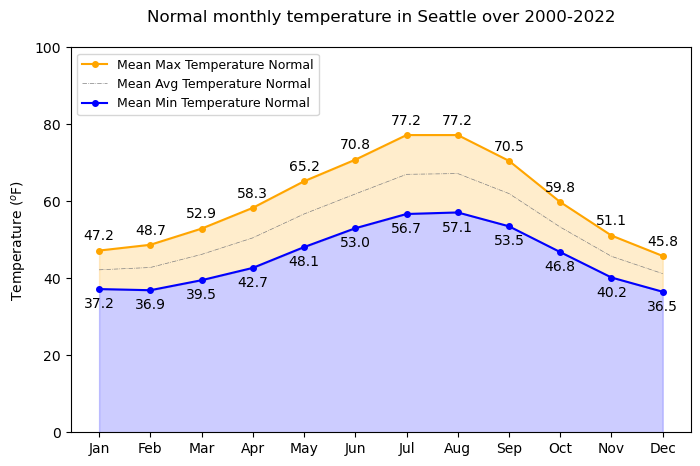

DATE,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
temp_max,47.2,48.7,52.9,58.3,65.2,70.8,77.2,77.2,70.5,59.8,51.1,45.8
temp_avg,42.2,42.8,46.2,50.5,56.7,61.9,67.0,67.2,62.0,53.3,45.7,41.2
temp_min,37.2,36.9,39.5,42.7,48.1,53.0,56.7,57.1,53.5,46.8,40.2,36.5


In [21]:
fig,ax = plt.subplots(figsize=(8,5))


monthly_temp['temp_max'].plot(ax=ax, marker='o',markersize=4, color='orange', 
                              label='Mean Max Temperature Normal')
monthly_temp['temp_avg'].plot(ax=ax, linestyle='-.', color='grey', linewidth='0.5', 
                              label='Mean Avg Temperature Normal')
monthly_temp['temp_min'].plot(ax=ax, marker='o',markersize=4, color='blue',
                              label='Mean Min Temperature Normal')

ax.fill_between(monthly_temp.index,0, monthly_temp.temp_min, interpolate=True, color='blue', alpha=0.2)
ax.fill_between(monthly_temp.index, monthly_temp.temp_min, monthly_temp.temp_max, interpolate=True, color='orange', alpha=0.2)


ax.set_ylim(0,100)
ax.set_xticks(monthly_temp.index)
ax.set_xticklabels(monthly_temp.index)
ax.set_xlabel("")
ax.set_ylabel("Temperature ($^o$F)")
ax.legend(loc='upper left', fontsize= 9)
ax.set_title("Normal monthly temperature in Seattle over 2000-2022\n")

# Display text values for each data point
for index, row in monthly_temp.iterrows():
    ax.text(index, row['temp_max']+2, row['temp_max'],ha='center', va='bottom')
    ax.text(index, row['temp_min']-2, row['temp_min'],ha='center', va='top')
    #ax.text(index, row['temp_avg']+3, row['temp_avg'],ha='center', va='top', size = 'smaller')

plt.show()
fig.savefig("Temp.png")  

# Show monthly temperature table
monthly_temp[['temp_max', 'temp_avg', 'temp_min']].T

Some insights drawn from the graph:
- Temperature is highest in July and August and lowest in December to February.
Seatle seems to have a mild summer with average max temperature is between 70 and 80.
Average min temperature in the winter doesn't does below freezing so the winter is not too cold either. 
- In the summer, the average difference is 20 degree while in the winter, the average difference between high and low temperatures is 10 degree. Therefore, the temperature seems to fluctuate more in the summer.
Since in the summer, the temperature does from 50 something to 70 something, which means that it could be chill in the early morning and gets hot later in the day.


#### 

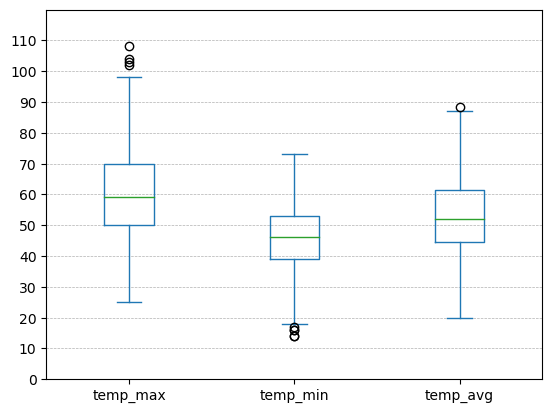

In [28]:
# Explore temperature distributions
ax = temp.plot.box()
plt.grid(axis = 'y', linestyle = 'dashed', linewidth = 0.5)
ax.set_axisbelow(True)
ax.set(ylim=(0,120), yticks=np.arange(0,120,10))
plt.show()


There are outliers in temperature max and temperature min. The exceptionally high temperature are above 100 and exceptionally low temperature is below 20.

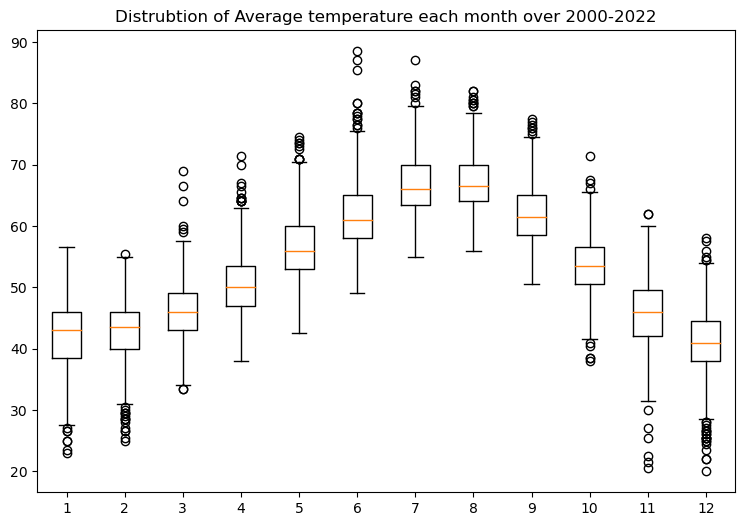

In [24]:
import matplotlib.pyplot as plt
import numpy as np

month_i=[]
for i in range(1,13):
    month_i.append(temp['temp_avg'][temp.index.month ==i])
    
plt.figure(figsize=(9,6))
plt.boxplot(month_i)
plt.title("Distrubtion of Average temperature each month over 2000-2022")
plt.show()


### 2.Precipitation

In [ ]:
# Sum up precipitation of each month of each year
month_year_total_precip = precip.resample("M").sum()

# Calculate monthly total precipation normal over 2000-2022
monthly_total_precip_normal= month_year_total_precip.groupby(month_year_total_precip.index.month).mean()

# Change index from month number to month name
monthly_total_precip_normal.index = monthly_total_precip_normal.index.to_series().apply(lambda x: calendar.month_abbr[x])

#print(month_year_total_precip)

In [ ]:
# Visualize mean monthly total precipitation

ax = monthly_total_precip_normal['precip'].plot.bar()
plt.xlabel("")
plt.ylabel("Precipitation (inches)")
plt.title(" Monthly total precipitation normal 2000-2022\n")
plt.grid(linestyle = 'dashed', linewidth = 0.5)
ax.set_axisbelow(True)
plt.show()
monthly_total_precip_normal.round(2).T

- November is the month with most precipitation. 
- Rain a lot in Nov to Jan.
- Medium rain from Feb to April to Oct.
- Less rain from May to Sep
- July is the driest month of the year.

### 3. Snow

In [ ]:
snow

In [ ]:
# Calculate total snow per month-year

snow_month_year = snow.resample("M").sum()
snow_month_year

In [ ]:
monthly_total_snow_normal = snow_month_year.groupby(snow_month_year.index.month).mean()
monthly_total_snow_normal.index = monthly_total_snow_normal.index.to_series().apply(lambda x: calendar.month_abbr[x])



In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
max_snow = max(monthly_total_snow_normal.max(axis=1))
print(max_snow)

monthly_total_snow_normal['snow_fall'].plot(ax=ax1, kind="bar")
#ax1.set_title("Monthly Total Snow Fall nomral (2008-2022)")
ax1.set(xlabel=None,
       title="Monthly Total Snow Fall nomral (2008-2022)",
       ylim= (0,max_snow+1))


monthly_total_snow_normal['snow_depth'].plot(ax=ax2, kind="bar")
ax2.set(xlabel=None,
       title="Monthly Total Snow Depth nomral (2008-2022)",
       ylim= (0,max_snow+1))
        
plt.show()
monthly_total_snow_normal.T

- Feb has the most snow of the year.
- Majority of snow is from Dec to Feb.
- There are low chances of snow in Mar and Nov. 
- There seems to be no snow in Apr to Oct. 


### ALL in one